In [ ]:
%pip install gensim

In [2]:
from gensim.models import Nmf
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

C:\Users\lored\AppData\Roaming\Python\Python310\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


### Training the model on an existing corpus -- no cell

In [ ]:
from gensim.models import Nmf
from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary

# Create a corpus from a list of texts
#common_dictionary = Dictionary(common_texts)
#common_corpus = [common_dictionary.doc2bow(text) for text in common_texts]

# Train the model on the corpus.
#nmf = Nmf(common_corpus, num_topics=10)

# using gensim

In [ ]:
import gensim
from gensim import corpora, models

# Load the dataset of news articles
documents = []
with open('../txt_for_classification/result_whatabout.txt', 'r',encoding='utf-8') as f:
    for line in f:
        documents.append(line.lower())

# Preprocess the documents # the following 2 lines are not used for now
stopwords = set(gensim.parsing.preprocessing.STOPWORDS)
stemmer = gensim.parsing.preprocessing.PorterStemmer()

preprocessed_docs=[]
for doc in documents:
    
    tokens = gensim.parsing.preprocessing.preprocess_string(str(doc).strip())
    preprocessed_docs.append(tokens)

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(preprocessed_docs)
corpus = [dictionary.doc2bow(text) for text in preprocessed_docs]

# Train an LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=2,  id2word=dictionary) #num_topics=10, 

# Print the topics
for topic_id in range(2):
    topic_words = lda_model.show_topic(topic_id)
    print('Topic {}:'.format(topic_id + 1))
    for word, prob in topic_words:
        print('  {} - {}'.format(word, prob))

Topic 1:
  chang - 0.013398014940321445
  climat - 0.010509882122278214
  talk - 0.008832168765366077
  peopl - 0.008522125892341137
  problem - 0.00580101041123271
  immigr - 0.005608762614428997
  countri - 0.005543948616832495
  know - 0.005256748292595148
  concern - 0.004774557892233133
  kill - 0.004588300362229347
Topic 2:
  year - 0.007909577339887619
  talk - 0.006956208031624556
  countri - 0.0056928545236587524
  bad - 0.005335348658263683
  right - 0.00509968725964427
  industri - 0.004637794103473425
  wors - 0.004272168967872858
  critic - 0.003975300583988428
  matter - 0.003708871081471443
  caus - 0.0036507570184767246
Topic 3:
  right - 0.011886358261108398
  issu - 0.008712450973689556
  peopl - 0.007496761158108711
  critic - 0.006749476306140423
  like - 0.0063687763176858425
  talk - 0.006022550165653229
  man - 0.0047571309842169285
  dai - 0.0042122225277125835
  need - 0.003978360909968615
  consid - 0.0039637344889342785
Topic 4:
  right - 0.018692301586270332

In [2]:
import chardet

with open('../txt_for_classification/result_whatabout.txt', 'rb') as f:
    detector = chardet.UniversalDetector()
    for line in f:
        detector.feed(line)
        if detector.done:
            break
    encoding = detector.result['encoding']
    print(encoding)

utf-8


In [3]:
with open('../txt_for_classification/result_whatabout.txt', 'r', encoding='utf-8') as f:
    for line in f:
        documents.append(line.lower())

In [4]:
import gensim
from gensim import corpora, models

# Load the dataset of news articles
documents = []
with open('../txt_for_classification/result_whatabout.txt', 'r',encoding='utf-8') as f:
    for line in f:
        documents.append(line.lower())

# Preprocess the documents # the following 2 lines are not used for now
stopwords = set(gensim.parsing.preprocessing.STOPWORDS)
stemmer = gensim.parsing.preprocessing.PorterStemmer()

preprocessed_docs=[]
for doc in documents:
    
    tokens = gensim.parsing.preprocessing.preprocess_string(str(doc).strip())
    preprocessed_docs.append(tokens)

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(preprocessed_docs)
corpus = [dictionary.doc2bow(text) for text in preprocessed_docs]
# Set the number of topics and the number of words per topic
num_topics = 3  # Adjust this to the desired number of topics
num_words_per_topic = 10  # Adjust this to the desired number of words per topic

# Train an LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=3,  id2word=dictionary) #num_topics=10, 

# Print the topics
for topic_id in range(3):
    topic_words = lda_model.show_topic(topic_id)
    print('Topic {}:'.format(topic_id + 1))
    for word, prob in topic_words:
        print('  {} - {}'.format(word, prob))

Topic 1:
  chang - 0.007977734319865704
  peopl - 0.006936363410204649
  emiss - 0.006732662674039602
  climat - 0.006471371743828058
  issu - 0.006005206145346165
  critic - 0.00537140853703022
  right - 0.005251333583146334
  think - 0.0047280024737119675
  like - 0.004600710701197386
  talk - 0.004143406171351671
Topic 2:
  problem - 0.008348915725946426
  talk - 0.008179829455912113
  right - 0.00816196296364069
  climat - 0.006400400307029486
  global - 0.006109984125941992
  chang - 0.005914841778576374
  countri - 0.005576933268457651
  warm - 0.005166283342987299
  pollut - 0.005040956661105156
  peopl - 0.004676023498177528
Topic 3:
  right - 0.01700039766728878
  critic - 0.01589919999241829
  climat - 0.005638213362544775
  year - 0.0055801826529204845
  countri - 0.00480219442397356
  address - 0.004408781882375479
  talk - 0.004072261042892933
  chang - 0.003857867792248726
  let - 0.0035250349901616573
  kill - 0.0034664624836295843


##  code for NMF with gensim

In [1]:
import gensim
from gensim import corpora, models


C:\Users\lored\AppData\Roaming\Python\Python310\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (5.2.0)/charset_normalizer (2.0.11) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


In [2]:
stopwords = set(gensim.parsing.preprocessing.STOPWORDS)
stemmer = gensim.parsing.preprocessing.PorterStemmer()



In [3]:

preprocessed_docs = []
with open('../txt_for_classification/result_whatabout.txt', 'r', encoding='utf-8') as f:
    for line in f:
        tokens = gensim.parsing.preprocessing.preprocess_string(line)
        preprocessed_docs.append(tokens)

In [4]:
dictionary = corpora.Dictionary(preprocessed_docs)


In [5]:
corpus = [dictionary.doc2bow(text) for text in preprocessed_docs]


In [42]:
%pip install gensim --upgrade

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files\Python310\python.exe -m pip install --upgrade pip' command.


In [9]:

from gensim.models import Nmf
nmf_model = gensim.models.nmf.Nmf(corpus, num_topics=10)


In [10]:
nmf_model.update(corpus)

In [12]:
for topic_id in range(10):
    topic_words = nmf_model.show_topic(topic_id)
    print('Topic {}:'.format(topic_id + 1))
    for word, prob in topic_words:
        print('  {} - {}'.format(word, prob))

Topic 1:
  2 - 0.06725105452194872
  77 - 0.05832713622114129
  193 - 0.0290557106563293
  723 - 0.02808797857336904
  1198 - 0.028019714463088184
  435 - 0.021897389987087516
  46 - 0.01693430294819616
  430 - 0.016138472071946595
  459 - 0.015810215402515954
  571 - 0.015166629353338098
Topic 2:
  89 - 0.023720020786338825
  1213 - 0.011486643314612062
  780 - 0.01144862761502811
  1193 - 0.011292037214765207
  933 - 0.011111553205961138
  182 - 0.010326758262832443
  438 - 0.010245376849568959
  74 - 0.009518730022598301
  91 - 0.009174953908020443
  720 - 0.00884869783337932
Topic 3:
  274 - 0.05057242553355628
  394 - 0.03397525767516671
  830 - 0.015789187929598974
  122 - 0.014646107618542806
  662 - 0.013728948126869067
  430 - 0.012939329145467474
  544 - 0.012747108149854228
  83 - 0.012556360881394954
  183 - 0.011552900380458699
  353 - 0.010589937282510148
Topic 4:
  89 - 0.03317188716984581
  720 - 0.029360670532474032
  269 - 0.028629940730100816
  324 - 0.02441047214001

In [15]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'documents' is a list of text documents

documents = []

preprocessed_docs = []
with open('../txt_for_classification/result_whatabout.txt', 'r', encoding='utf-8') as f:
    for line in f:
        tokens = gensim.parsing.preprocessing.preprocess_string(line)
        documents.append(tokens)
# Convert the text data into a TF-IDF matrix
vectorizer = TfidfVectorizer(max_df=0.85, min_df=2, stop_words='english')
tfidf_matrix = vectorizer.fit_transform(documents)

# Set the number of topics
num_topics = 3  # Adjust this to the desired number of topics

# Fit the NMF model
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf_matrix)

# Function to get top keywords for each topic
def get_top_keywords(model, feature_names, n_top_words):
    topics_keywords = []
    for topic_idx, topic in enumerate(model.components_):
        top_keywords_idx = topic.argsort()[:-n_top_words - 1:-1]
        top_keywords = [feature_names[i] for i in top_keywords_idx]
        topics_keywords.append(top_keywords)
    return topics_keywords

# Get feature names (words) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Set the number of top keywords per topic
num_top_words = 15  # Adjust this to the desired number of keywords per topic

# Get the top keywords for each topic
topics_keywords = get_top_keywords(nmf_model, feature_names, num_top_words)

# Map topic IDs to keywords
topic_mapping = {f"Topic {i + 1}": keywords for i, keywords in enumerate(topics_keywords)}

# Print or use the topic mapping as needed

print(topic_mapping)


AttributeError: 'list' object has no attribute 'lower'

In [14]:
from gensim import corpora, models
from pprint import pprint

# Assuming 'documents' is a list of text documents
documents =   []
with open('../txt_for_classification/result_whatabout.txt', 'r', encoding='utf-8') as f:
    for line in f:
        tokens = line
        documents.append(tokens)
# Tokenize the documents and create a dictionary and a corpus
tokenized_documents = [document.split() for document in documents]
dictionary = corpora.Dictionary(tokenized_documents)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

# Set the number of topics
num_topics = 5  # Adjust this to the desired number of topics

# Build the LDA model
lda_model = models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Function to get top keywords for each topic
def get_top_keywords(lda_model, num_words):
    topics_keywords = []
    for topic_id in range(num_topics):
        topic_keywords = lda_model.show_topic(topic_id, topn=num_words)
        keywords = [word for word, _ in topic_keywords]
        topics_keywords.append(keywords)
    return topics_keywords

# Set the number of top keywords per topic
num_top_words = 10  # Adjust this to the desired number of keywords per topic

# Get the top keywords for each topic
topics_keywords = get_top_keywords(lda_model, num_top_words)

# Map topic IDs to keywords
topic_mapping = {f"Topic {i + 1}": keywords for i, keywords in enumerate(topics_keywords)}

# Print or use the topic mapping as needed
pprint(topic_mapping)


{'Topic 1': ['the', 'of', 'a', 'to', 'and', 'they', 'in', 'is', 'was', 'be'],
 'Topic 2': ['the',
             'to',
             'of',
             'and',
             'about',
             'that',
             'a',
             'but',
             'in',
             'what'],
 'Topic 3': ['a',
             'the',
             'at',
             'any',
             'bigger',
             'was',
             'than',
             'from',
             'or',
             'out'],
 'Topic 4': ['the', 'to', 'about', 'are', 'of', 'in', 'a', 'and', 'is', 'not'],
 'Topic 5': ['the',
             'of',
             'to',
             'in',
             'is',
             'that',
             'a',
             'and',
             'about',
             'they']}


# Kaggle notebook
https://www.kaggle.com/code/rockystats/topic-modelling-using-nmf

In [16]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


file_name = '../csv/yes_whatabout_with_labels.csv'

# Load the articles
df = pd.read_csv(file_name)

print(df.shape)
df.head()

(503, 2)


,Text,Label
0,Urgent action to prevent a pandemic is of cour...,0
1,"Dad: Billy, when did you last tidy your room? ...",0
2,The West has no right to criticize our record ...,0
3,but what about the economy?,0
4,So President Trump wants to ban certain flavou...,0


In [17]:
# defining all utilty functions - needed for Data cleaning and processing

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk

# Contraction map
c_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
}

# Compiling the contraction dict
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))

# List of stop words
#add_stop = ['said', 'say', '...', 'like', 'cnn', 'ad']
#stop_words = ENGLISH_STOP_WORDS.union(add_stop)

# List of punctuation
punc = list(set(string.punctuation))


# Splits words on white spaces (leaves contractions intact) and splits out
# trailing punctuation
def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens


def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)


def process_text(text):
    text = casual_tokenizer(text)
    text = [each.lower() for each in text]
    text = [re.sub('[0-9]+', '', each) for each in text]
    text = [expandContractions(each, c_re=c_re) for each in text]
    text = [SnowballStemmer('english').stem(each) for each in text]
    text = [w for w in text if w not in punc]
    #decide how to deal with stopwords ---> NOT REMOVING HERE
    #text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 1]
    text = [each for each in text if ' ' not in each]
    return text


def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]  


def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)


def whitespace_tokenizer(text): 
    pattern = r"(?u)\b\w\w+\b" 
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens


# Funtion to remove duplicate words
def unique_words(text): 
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist


def word_count(text):
    return len(str(text).split(' '))

In [18]:
# Get the word count
df['word_count'] = df['Text'].apply(word_count)
df['word_count'].mean()

25.42544731610338

In [19]:
# Process the text
df['processed_text'] = df['Text'].apply(process_text)
df.head()

,Text,Label,word_count,processed_text
0,Urgent action to prevent a pandemic is of cour...,0,33,"[urgent, action, to, prevent, pandem, is, of, ..."
1,"Dad: Billy, when did you last tidy your room? ...",0,67,"[dad, billi, when, did, you, last, tidi, your,..."
2,The West has no right to criticize our record ...,0,33,"[the, west, has, no, right, to, critic, our, r..."
3,but what about the economy?,0,5,"[but, what, about, the, economi]"
4,So President Trump wants to ban certain flavou...,0,14,"[so, presid, trump, want, to, ban, certain, fl..."


In [20]:
# Descriptive statistics for word count
df['word_count'].describe()

count    503.000000
mean      25.425447
std       18.992500
min        3.000000
25%       15.000000
50%       21.000000
75%       30.500000
max      256.000000
Name: word_count, dtype: float64

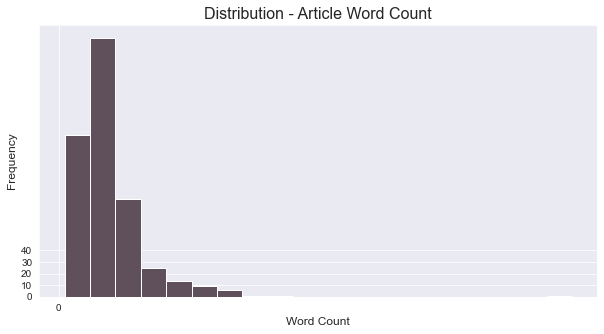

In [21]:
# Plot a hist of the word counts
fig = plt.figure(figsize=(10,5))

plt.hist(
    df['word_count'],
    bins=20,
    color='#60505C'
)

plt.title('Distribution - Article Word Count', fontsize=16)
plt.ylabel('Frequency', fontsize=12)
plt.xlabel('Word Count', fontsize=12)
plt.yticks(np.arange(0, 50, 10))
plt.xticks(np.arange(0, 200, 200))


plt.show()

In [22]:
# Get the top 20 most common words among all the articles
p_text = df['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,the,643
1,to,360
2,of,308
3,and,241
4,about,226
5,that,205
6,in,190
7,but,174
8,you,156
9,what,156


In [23]:
# Get the number of unique words after processing
num_unique_words = len(set(p_text))
num_unique_words

2337

In [24]:
texts = df['processed_text']

tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

In [25]:
nmf = NMF(
    n_components=20,
    init='nndsvd'
).fit(tfidf)

C:\Users\lored\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


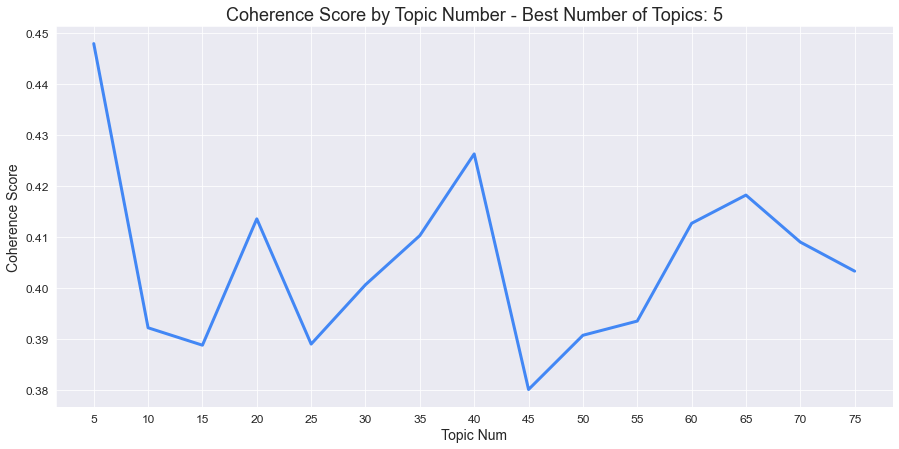

In [49]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = df['processed_text']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 75 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [28]:
# Now use the number of topics with the 
# highest coherence score to run the 
# sklearn nmf model

texts = df['processed_text']

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names()

# Run the nmf model
nmf = NMF(
    n_components=best_num_topics,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha_W=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)

C:\Users\lored\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


NameError: name 'best_num_topics' is not defined

In [27]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 8

topic_df = topic_table(
    nmf,
    tfidf_fn,
    n_top_words
).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df.head()

,0,1,2,3,4,5,6,7,topics
0,the,of,and,to,is,in,that,it,the of and to is in that it
1,critic,to critic,no right,right to,right,no,have no,you,critic to no right have you
2,about,what,what about,but what,about the,but,the,your,about what but the your
3,talk,talk about,whi,we,you,about,whi we,we talk,talk about whi we you


In [52]:
# Create a df with only the created topics and topic num
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

topic_df.head()

,topic_num,topics
0,0,the of and to is in that it
1,1,critic to no right have you
2,2,about what but the your
3,3,talk about whi we you
4,4,are there but problem mani also


In [53]:
# Showing the 3 matrices we get with nmf
A = tfidf_vectorizer.transform(texts)
W = nmf.components_
H = nmf.transform(A)

print('A = {} x {}'.format(A.shape[0], A.shape[1]))
print('W = {} x {}'.format(W.shape[0], W.shape[1]))
print('H = {} x {}'.format(H.shape[0], H.shape[1]))

A = 530 x 1227
W = 5 x 1227
H = 530 x 5


# topics when removing stopwords 

In [29]:
import pandas as pd
import numpy as np
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary
from gensim.models.nmf import Nmf
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


file_name = '../csv/yes_whatabout_with_labels.csv'

# Load the articles
df = pd.read_csv(file_name)

print(df.shape)
df.head()

(503, 2)


,Text,Label
0,Urgent action to prevent a pandemic is of cour...,0
1,"Dad: Billy, when did you last tidy your room? ...",0
2,The West has no right to criticize our record ...,0
3,but what about the economy?,0
4,So President Trump wants to ban certain flavou...,0


In [30]:
# defining all utilty functions - needed for Data cleaning and processing

from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import string
import re
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer, RegexpTokenizer
import nltk

# Contraction map
c_dict = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "I would",
    "i'd've": "I would have",
    "i'll": "I will",
    "i'll've": "I will have",
    "i'm": "I am",
    "i've": "I have",
    "isn't": "is not",
    "it'd": "it had",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so is",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there had",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we had",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'alls": "you alls",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you had",
    "you'd've": "you would have",
    "you'll": "you you will",
    "you'll've": "you you will have",
    "you're": "you are",
    "you've": "you have"
}

# Compiling the contraction dict
c_re = re.compile('(%s)' % '|'.join(c_dict.keys()))

# List of stop words
add_stop = ['said', 'say', '...', 'like', 'cnn', 'ad']
stop_words = ENGLISH_STOP_WORDS.union(add_stop)

# List of punctuation
punc = list(set(string.punctuation))


# Splits words on white spaces (leaves contractions intact) and splits out
# trailing punctuation
def casual_tokenizer(text):
    tokenizer = TweetTokenizer()
    tokens = tokenizer.tokenize(text)
    return tokens


def expandContractions(text, c_re=c_re):
    def replace(match):
        return c_dict[match.group(0)]
    return c_re.sub(replace, text)


def process_text(text):
    text = casual_tokenizer(text)
    text = [each.lower() for each in text]
    text = [re.sub('[0-9]+', '', each) for each in text]
    text = [expandContractions(each, c_re=c_re) for each in text]
    text = [SnowballStemmer('english').stem(each) for each in text]
    text = [w for w in text if w not in punc]
    #decide how to deal with stopwords ---> REMOVING THEM HERE
    text = [w for w in text if w not in stop_words]
    text = [each for each in text if len(each) > 1]
    text = [each for each in text if ' ' not in each]
    return text


def top_words(topic, n_top_words):
    return topic.argsort()[:-n_top_words - 1:-1]  


def topic_table(model, feature_names, n_top_words):
    topics = {}
    for topic_idx, topic in enumerate(model.components_):
        t = (topic_idx)
        topics[t] = [feature_names[i] for i in top_words(topic, n_top_words)]
    return pd.DataFrame(topics)


def whitespace_tokenizer(text): 
    pattern = r"(?u)\b\w\w+\b" 
    tokenizer_regex = RegexpTokenizer(pattern)
    tokens = tokenizer_regex.tokenize(text)
    return tokens


# Funtion to remove duplicate words
def unique_words(text): 
    ulist = []
    [ulist.append(x) for x in text if x not in ulist]
    return ulist


def word_count(text):
    return len(str(text).split(' '))

In [31]:
# Process the text
df['processed_text'] = df['Text'].apply(process_text)
df.head()

,Text,Label,processed_text
0,Urgent action to prevent a pandemic is of cour...,0,"[urgent, action, prevent, pandem, cours, neces..."
1,"Dad: Billy, when did you last tidy your room? ...",0,"[dad, billi, did, tidi, room, absolut, tip, ti..."
2,The West has no right to criticize our record ...,0,"[west, right, critic, record, human, right, lo..."
3,but what about the economy?,0,[economi]
4,So President Trump wants to ban certain flavou...,0,"[presid, trump, want, ban, certain, flavour, v..."


In [32]:
# Get the top 20 most common words among all the articles
p_text = df['processed_text']

# Flaten the list of lists
p_text = [item for sublist in p_text for item in sublist]

# Top 20
top_20 = pd.DataFrame(
    Counter(p_text).most_common(20),
    columns=['word', 'frequency']
)

top_20

,word,frequency
0,right,77
1,critic,66
2,whi,59
3,climat,48
4,chang,46
5,talk,42
6,problem,38
7,peopl,37
8,countri,34
9,issu,33


In [33]:
texts = df['processed_text']

tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=5000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

In [34]:
nmf = NMF(
    n_components=20,
    init='nndsvd'
).fit(tfidf)

C:\Users\lored\AppData\Roaming\Python\Python310\site-packages\sklearn\decomposition\_nmf.py:1692: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


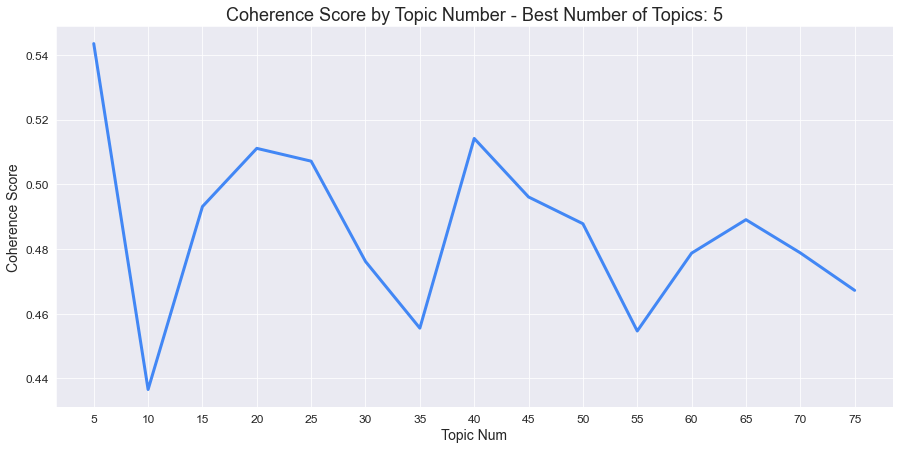

In [60]:
# Use Gensim's NMF to get the best num of topics via coherence score
texts = df['processed_text']

# Create a dictionary
# In gensim a dictionary is a mapping between words and their integer id
dictionary = Dictionary(texts)

# Filter out extremes to limit the number of features
dictionary.filter_extremes(
    no_below=3,
    no_above=0.85,
    keep_n=5000
)

# Create the bag-of-words format (list of (token_id, token_count))
corpus = [dictionary.doc2bow(text) for text in texts]

# Create a list of the topic numbers we want to try
topic_nums = list(np.arange(5, 75 + 1, 5))

# Run the nmf model and calculate the coherence score
# for each number of topics
coherence_scores = []

for num in topic_nums:
    nmf = Nmf(
        corpus=corpus,
        num_topics=num,
        id2word=dictionary,
        chunksize=2000,
        passes=5,
        kappa=.1,
        minimum_probability=0.01,
        w_max_iter=300,
        w_stop_condition=0.0001,
        h_max_iter=100,
        h_stop_condition=0.001,
        eval_every=10,
        normalize=True,
        random_state=42
    )
    
    # Run the coherence model to get the score
    cm = CoherenceModel(
        model=nmf,
        texts=texts,
        dictionary=dictionary,
        coherence='c_v'
    )
    
    coherence_scores.append(round(cm.get_coherence(), 5))

# Get the number of topics with the highest coherence score
scores = list(zip(topic_nums, coherence_scores))
best_num_topics = sorted(scores, key=itemgetter(1), reverse=True)[0][0]

# Plot the results
fig = plt.figure(figsize=(15, 7))

plt.plot(
    topic_nums,
    coherence_scores,
    linewidth=3,
    color='#4287f5'
)

plt.xlabel("Topic Num", fontsize=14)
plt.ylabel("Coherence Score", fontsize=14)
plt.title('Coherence Score by Topic Number - Best Number of Topics: {}'.format(best_num_topics), fontsize=18)
plt.xticks(np.arange(5, max(topic_nums) + 1, 5), fontsize=12)
plt.yticks(fontsize=12)

plt.show()

In [40]:
# Now use the number of topics with the 
# highest coherence score to run the 
# sklearn nmf model

texts = df['processed_text']

# Create the tfidf weights
tfidf_vectorizer = TfidfVectorizer(
    min_df=3,
    max_df=0.85,
    max_features=7000,
    ngram_range=(1, 2),
    preprocessor=' '.join
)

tfidf = tfidf_vectorizer.fit_transform(texts)

# Save the feature names for later to create topic summaries
tfidf_fn = tfidf_vectorizer.get_feature_names()

# Run the nmf model
nmf = NMF(
    n_components=4,
    init='nndsvd',
    max_iter=500,
    l1_ratio=0.0,
    solver='cd',
    alpha_W=0.0,
    tol=1e-4,
    random_state=42
).fit(tfidf)



C:\Users\lored\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [41]:
# Use the top words for each cluster by tfidf weight
# to create 'topics'

# Getting a df with each topic by document
docweights = nmf.transform(tfidf_vectorizer.transform(texts))

n_top_words = 10

topic_df = topic_table(
    nmf,
    tfidf_fn,
    n_top_words
).T

# Cleaning up the top words to create topic summaries
topic_df['topics'] = topic_df.apply(lambda x: [' '.join(x)], axis=1) # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets
topic_df['topics'] = topic_df['topics'].apply(lambda x: whitespace_tokenizer(x)) # tokenize
topic_df['topics'] = topic_df['topics'].apply(lambda x: unique_words(x))  # Removing duplicate words
topic_df['topics'] = topic_df['topics'].apply(lambda x: [' '.join(x)])  # Joining each word into a list
topic_df['topics'] = topic_df['topics'].str[0]  # Removing the list brackets

topic_df.head()

,0,1,2,3,4,5,6,7,8,9,topics
0,critic,right,right critic,becaus,did,sinc,wors,therefor,govern,critic becaus,critic right becaus did sinc wors therefor govern
1,talk,whi,whi talk,instead,die,ignor,news,topic,real,issu,talk whi instead die ignor news topic real issu
2,climat,chang,climat chang,emiss,address,focus,global,industri,pollut,consid,climat chang emiss address focus global indust...
3,problem,bigger,bigger problem,think,mani,issu,time,mani problem,clear,howev,problem bigger think mani issu time clear howev


In [63]:
# Create a df with only the created topics and topic num
topic_df = topic_df['topics'].reset_index()
topic_df.columns = ['topic_num', 'topics']

topic_df.head()

,topic_num,topics
0,0,critic right becaus sinc did wors therefor
1,1,talk whi die instead news ignor real
2,2,chang climat global address world emiss caus
3,3,problem bigger think mani clear time
4,4,countri issu focus consid just industri pollut...
